## 1. Import libarires

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# 2. Data Wrangling

## 2.1. Read the data

In [194]:
df_train = pd.read_csv('Data/train.csv')
df_test=pd.read_csv('Data/test.csv')


## 2.2. Overview of the data

<table>
  <tr>
    <th>Column Name</th>
    <th>Defination</th>
    <th>Key</th>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Survival</td>
    <td>0=No, 1=Yes</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket class</td>
    <td></td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Name of the passengers</td>
    <td></td>
  </tr>
    <tr>
    <td>Sex</td>
    <td>Gender of the passengers</td>
    <td></td>
  </tr>
    <tr>
    <td>Age</td>
    <td>Age of the passengers</td>
    <td></td>
  </tr>
    <tr>
    <td>SibSp</td>
    <td># of siblings / spouses aboard the Titanic</td>
    <td></td>
  </tr>
    <tr>
    <td>Parch</td>
    <td># of parents / children aboard the Titanic</td>
    <td></td>
  </tr>
    <tr>
    <td>Ticket</td>
    <td>Ticket number</td>
    <td></td>
  </tr>
    <tr>
    <td>Fare</td>
    <td>Passenger fare</td>
    <td></td>
  </tr>
    <tr>
    <td>Cabin</td>
    <td>Cabin number</td>
    <td></td>
  </tr>
    <tr>
    <td>Embarked</td>
    <td>Port of Embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</table>


In [195]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S


In [196]:
# shape of the dataset
df_train.shape

(891, 12)

In [197]:
df_test.shape

(418, 11)

In [198]:
# Data types of various columns & Checking for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<b>The description contains these information for each column</b>
<ul>
    <li>Age,Cabin,Emabarked has missing value.</li>
    <li>Age datatype is float.</li>
    <li>Survived, Sex, Emarked has datatype object</li>
</ul>

In [199]:
# Check for duplicate data
df_train.duplicated().sum()

0

In [200]:
# mathematical overview of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<b>The description contains these information for each column</b>
<ul>
    <li>count - The number of not-empty values.</li>
    <li>mean - The average (mean) value.</li>
    <li>std - The standard deviation.</li>
    <li>min - the minimum value.</li>
    <li>25% - The 25% percentile.</li>
    <li>50% - The 50% percentile.</li>
    <li>75% - The 75% percentile.</li>
    <li>max - the maximum value.</li>
</ul>
<b>From above information we can say that,</b>
<ul>
    <li>Minimum fare is 0 and maximum is 512.</li>
</ul>

# 3. EDA (Exploratory Data Analysis)

## 3.1 Analysis

### 3.1.1 Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


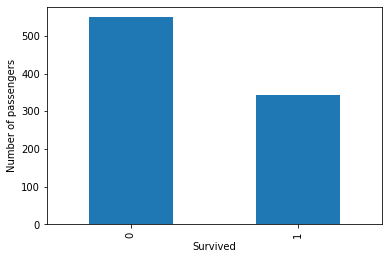

In [201]:
# The passengers who survived
print(df_train["Survived"].value_counts())
df_train['Survived'].value_counts().plot(kind='bar').set(xlabel="Survived", ylabel="Number of passengers")
plt.show()

<B>Conclusion:</B> <I>only 342 passengers survived</I>

3    491
1    216
2    184
Name: Pclass, dtype: int64


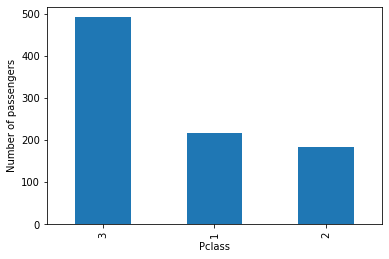

In [202]:
# group of Ticket class
print(df_train['Pclass'].value_counts())
df_train['Pclass'].value_counts().plot(kind='bar').set(xlabel="Pclass", ylabel="Number of passengers")
plt.show()

<b>Conclusion: </b><i>Passengers of Pclass=3 are more in numbers</i>

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


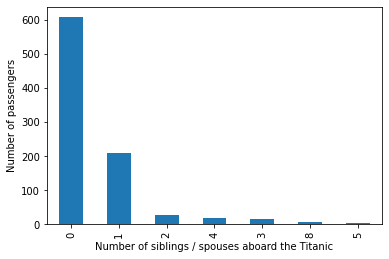

In [203]:
# Number of siblings / spouses aboard the Titanic
print(df_train['SibSp'].value_counts())
df_train['SibSp'].value_counts().plot(kind='bar').set(xlabel="Number of siblings / spouses aboard the Titanic", ylabel="Number of passengers")
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


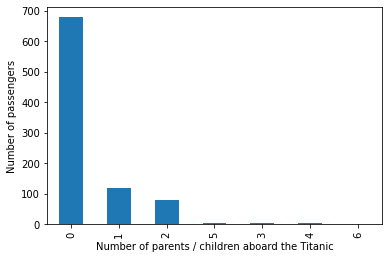

In [204]:
# Number of parents / children aboard the Titanic
print(df_train['Parch'].value_counts())
df_train['Parch'].value_counts().plot(kind='bar').set(xlabel="Number of parents / children aboard the Titanic", ylabel="Number of passengers")
plt.show()

male      577
female    314
Name: Sex, dtype: int64


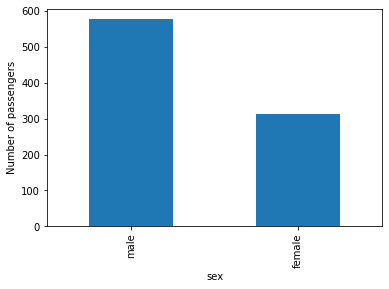

In [205]:
# Group of Passengers according to genders
print(df_train['Sex'].value_counts())
df_train['Sex'].value_counts().plot(kind='bar').set(xlabel='sex', ylabel='Number of passengers')
plt.show()

<b>Conclusion:</b> <I>Number of Male passengers were more than female passengers</I>

 Group of Passengers according to genders 
 People with age in between 0 and 20 :  164
 People with age greater than 20 and 30 :  245
 People with age greater than 30 and 40 :  180
 People with age greater than 40 and 50 :  99
 People with age greater than 50 :  64


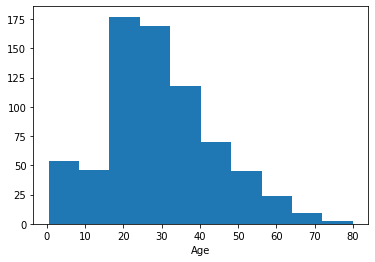

In [206]:
# Group of Passengers according to genders
print('\033[1;3m',"Group of Passengers according to genders",'\033[0m')
print(" People with age in between 0 and 20 : ",df_train[(df_train['Age']>0) & (df_train['Age']<20)].shape[0])
print(" People with age greater than 20 and 30 : ",df_train[(df_train['Age']>=20) & (df_train['Age']<=30)].shape[0])
print(" People with age greater than 30 and 40 : ",df_train[(df_train['Age']>=30) & (df_train['Age']<=40)].shape[0])
print(" People with age greater than 40 and 50 : ",df_train[(df_train['Age']>=40) & (df_train['Age']<=50)].shape[0])
print(" People with age greater than 50 : ",df_train[df_train['Age']>50].shape[0])
plt.hist(df_train['Age'])
plt.xlabel('Age')
plt.show()

<b>Conclusion:</b> <i>Most of the passengers are of age between 20-30</i>

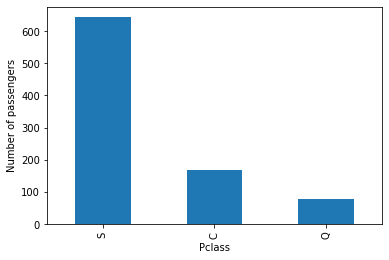

In [207]:
df_train['Embarked'].value_counts().plot(kind='bar').set(xlabel="Pclass", ylabel="Number of passengers")
plt.show()

<b>Conclusion:</b> <i>most passengers are from Southampton</i>

### 3.1.2 Bivariate Analysis

In [208]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

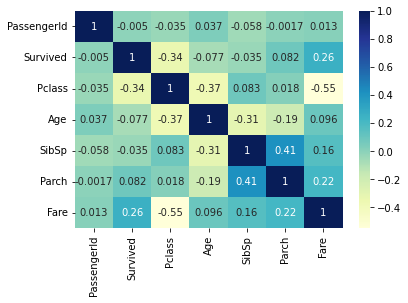

In [209]:
sns.heatmap(df_train.corr(),cmap="YlGnBu", annot=True)

The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.<br>
The number varies from -1 to 1.<br>
1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.<br>
<i><b>0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.</b></i><br>
<i><b>-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.</b></i><br>
<i><b>0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.</b><i/><br>
<b>What is a good correlation?</b> It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.

<b>From above information we can say that,</b>
<ul>
    <li>Not a good correlation between survived and Pclass,Age</li>
    <li>Not a good correlation between Pclass and Survived, Age, Fare.</li>
    <li>Not a good correlation between Sibsp and Age.</li>
    <li>Not a good correlation between Parch and Age.</li>
    
</ul>

        Survived
Pclass          
1            136
2             87
3            119


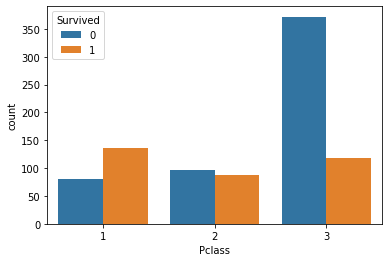

In [210]:
print(df_train[['Pclass','Survived']].groupby('Pclass').sum())
sns.countplot(x=df_train['Pclass'],hue=df_train['Survived'],data=df_train)
plt.show()

<b>Conclusion:</b> 
<ul>
  <li><i>Most of the Passengers who survived are of pclass=1</i></li> 
  <li><i>Most Passengers who died are of pclass=3</i></li>
</ul>

        Survived
Sex             
female       233
male         109


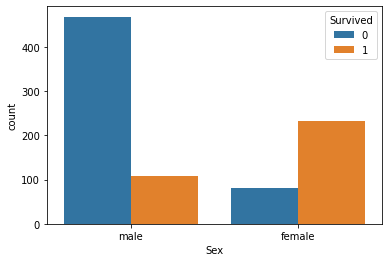

In [211]:
print(df_train[['Sex','Survived']].groupby('Sex').sum())
sns.countplot(x=df_train['Sex'],hue=df_train['Survived'],data=df_train)
plt.show()

<b>Conclusion:</b> 
<ul>
  <li><i>Most of the Passengers who survived are female</i></li> 
  <li><i>Most Passengers who died are male</i></li>
</ul>

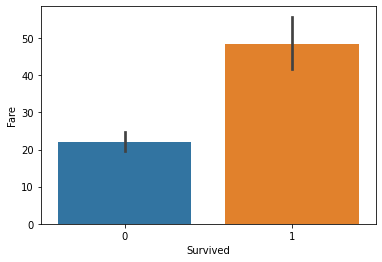

In [212]:
# Fare vs survival 
sns.barplot(x=df_train['Survived'],y=df_train['Fare'])
plt.show()

<b>Conclusion:</b> 
<ul>
  <li><i>The passengers who gave more fare survived</i></li> 
</ul>

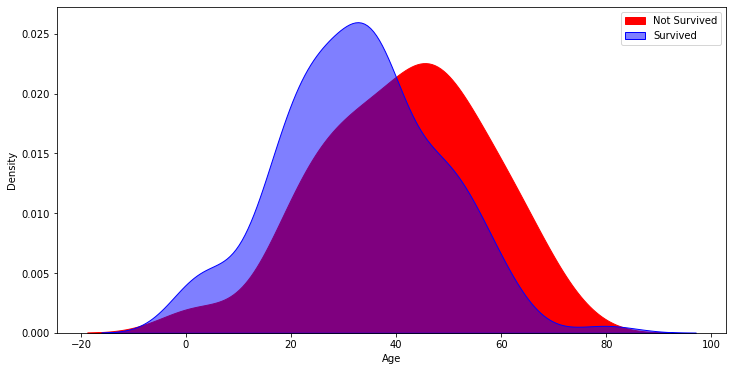

In [213]:
plt.figure(figsize=(12,6))
sns.kdeplot(x="Age",data=df_train[df_train['Survived']==0].dropna(),fill=True,alpha=1,color="red",label="Not Survived")
sns.kdeplot(x="Age",data=df_train[df_train['Survived']==1].dropna(),fill=True,alpha=0.5,color="blue",label="Survived")
plt.legend()
plt.show()

<b>Conclusion:</b> 
<ul>
  <li><i>Most of the passengers survived were childrens</i></li> 
  <li><i>Most of the passengers who did not survived were midddle aged adults</i></li>
</ul>

          Survived
Embarked          
C               93
Q               30
S              217


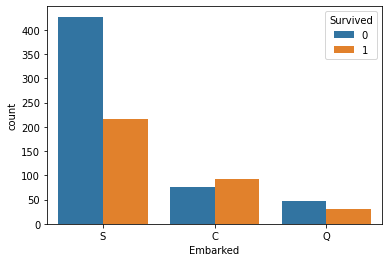

In [214]:
print(df_train[['Embarked','Survived']].groupby('Embarked').sum())
sns.countplot(x=df_train['Embarked'],hue=df_train['Survived'],data=df_train)
plt.show()

<b>Conclusion:</b> 
<ul>
  <li><i>Most of the Passengers who survived are from Southampton</i></li> 
  <li><i>Most Passengers who died are from Southampton</i></li>
</ul>

##  3.2 Data Cleaning

In [215]:
# train data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>Conclusion:<b>
<ul>
    <li>Age has 177 missing values</li>
    <li>Cabin has most missing values(687)</li>
    <li>Embarked has 2 missing values</li>
</ul>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

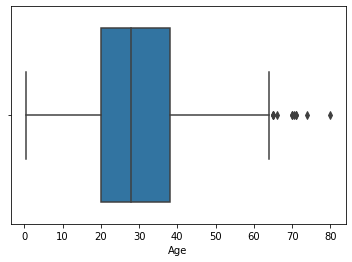

In [216]:
sns.boxplot(df_train['Age'])

In [217]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [218]:
df_train['Age'].isnull().sum()

0

In [219]:
df_train['Embarked'].fillna('S',inplace=True)

In [220]:
df_train['Embarked'].isnull().sum()

0

In [221]:
df_train.drop(columns=['Cabin'],inplace=True)

In [222]:
# test data
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<b>Conclusion:<b>
<ul>
    <li>Age has 86 missing values</li>
    <li>Cabin has most missing values(327)</li>
    <li>Fare has 1 missing values</li>
</ul>

In [223]:
df_test.drop(columns=['Cabin'],inplace=True)

In [224]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [225]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [226]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 4 Feature Engineering

## 4.1 Changing data type for the following cols
<ul>
    <li>Survived(int)-->Survived(category)</li>
    <li>PClass(object)-->PClass(category)</li>
    <li>Sex(object)-->Sex(category)</li>
    <li>Age(float)-->Age(int)</li>
    <li>Embarked(object)-->Embarked(category)</li>
</ul>

In [227]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [228]:
df_train['Embarked']=df_train['Embarked'].astype("category")
df_train['Pclass']=df_train['Pclass'].astype("category")
df_train['Sex']=df_train['Sex'].astype("category")
df_train['Age']=df_train['Age'].astype("int")

In [229]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(1), int64(5), object(2)
memory usage: 58.8+ KB


## 4.2 Feature Selection

In [230]:
# Droping column
df_train.drop(columns=['Name','Ticket'],inplace=True)
df_test.drop(columns=['Name','Ticket'],inplace=True)

In [231]:
df_train['temp_Family']=df_train['SibSp'] + df_train['Parch']
df_test['temp_Family']=df_test['SibSp'] + df_test['Parch']

In [232]:
df_train.drop(columns=['SibSp','Parch'],inplace=True)
df_test.drop(columns=['SibSp','Parch'],inplace=True)

In [233]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,temp_Family
0,1,0,3,male,22,7.2500,S,1
1,2,1,1,female,38,71.2833,C,1
2,3,1,3,female,26,7.9250,S,0
3,4,1,1,female,35,53.1000,S,1
4,5,0,3,male,35,8.0500,S,0


In [234]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,temp_Family
0,892,3,male,34.5,7.8292,Q,0
1,893,3,female,47.0,7.0000,S,1
2,894,2,male,62.0,9.6875,Q,0
3,895,3,male,27.0,8.6625,S,0
4,896,3,female,22.0,12.2875,S,2


In [235]:
# Grouping Age
bins= [0,16,30,45,50]
labels = ['Childern','Young Adults','Middle-aged Adults','Old Adults']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_test['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
print (df_train['AgeGroup'])

0            Young Adults
1      Middle-aged Adults
2            Young Adults
3      Middle-aged Adults
4      Middle-aged Adults
              ...        
886          Young Adults
887          Young Adults
888          Young Adults
889          Young Adults
890    Middle-aged Adults
Name: AgeGroup, Length: 891, dtype: category
Categories (4, object): ['Childern' < 'Young Adults' < 'Middle-aged Adults' < 'Old Adults']


In [236]:
# Grouping Family
bins= [0,1,5,7,11]
labels = ['Alone','Dou','Small','Large']
df_train['Family'] = pd.cut(df_train['temp_Family'], bins=bins, labels=labels, right=False)
df_test['Family'] = pd.cut(df_train['temp_Family'], bins=bins, labels=labels, right=False)
print (df_train['Family'])

0        Dou
1        Dou
2      Alone
3        Dou
4      Alone
       ...  
886    Alone
887    Alone
888      Dou
889    Alone
890    Alone
Name: Family, Length: 891, dtype: category
Categories (4, object): ['Alone' < 'Dou' < 'Small' < 'Large']


In [237]:
df_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,temp_Family,AgeGroup,Family
0,892,3,male,34.50000,7.8292,Q,0,Young Adults,Dou
1,893,3,female,47.00000,7.0000,S,1,Middle-aged Adults,Dou
2,894,2,male,62.00000,9.6875,Q,0,Young Adults,Alone
3,895,3,male,27.00000,8.6625,S,0,Middle-aged Adults,Dou
4,896,3,female,22.00000,12.2875,S,2,Middle-aged Adults,Alone
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,8.0500,S,0,Young Adults,Alone
414,1306,1,female,39.00000,108.9000,C,0,Middle-aged Adults,Alone
415,1307,3,male,38.50000,7.2500,S,0,Young Adults,Alone
416,1308,3,male,30.27259,8.0500,S,0,Middle-aged Adults,Dou


In [238]:
df_final_train=pd.get_dummies(df_train, columns=['Pclass','Sex','Embarked','AgeGroup','Family'], drop_first=True)
df_final_test=pd.get_dummies(df_test, columns=['Pclass','Sex','Embarked','AgeGroup','Family'], drop_first=True)

In [239]:
df_final_train.head()

,PassengerId,Survived,Age,Fare,temp_Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young Adults,AgeGroup_Middle-aged Adults,AgeGroup_Old Adults,Family_Dou,Family_Small,Family_Large
0,1,0,22,7.2500,1,0,1,1,0,1,1,0,0,1,0,0
1,2,1,38,71.2833,1,0,0,0,0,0,0,1,0,1,0,0
2,3,1,26,7.9250,0,0,1,0,0,1,1,0,0,0,0,0
3,4,1,35,53.1000,1,0,0,0,0,1,0,1,0,1,0,0
4,5,0,35,8.0500,0,0,1,1,0,1,0,1,0,0,0,0


In [240]:
df_final_test.head()

,PassengerId,Age,Fare,temp_Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Young Adults,AgeGroup_Middle-aged Adults,AgeGroup_Old Adults,Family_Dou,Family_Small,Family_Large
0,892,34.5,7.8292,0,0,1,1,1,0,1,0,0,1,0,0
1,893,47.0,7.0000,1,0,1,0,0,1,0,1,0,1,0,0
2,894,62.0,9.6875,0,1,0,1,1,0,1,0,0,0,0,0
3,895,27.0,8.6625,0,0,1,1,0,1,0,1,0,1,0,0
4,896,22.0,12.2875,2,0,1,0,0,1,0,1,0,0,0,0


In [241]:
# Droping column
df_final_train.drop(columns=['Age','temp_Family'],inplace=True)
df_final_test.drop(columns=['Age','temp_Family'],inplace=True)

In [242]:
df_final_train.shape

(891, 14)

In [243]:
df_final_test.shape

(418, 13)

In [244]:
y_test=df_final_train['Survived']
X_test=df_final_train.drop(columns="Survived")

# Model Building

In [245]:
# Split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_test,y_test,test_size=0.2,random_state=42)

In [246]:
from sklearn.linear_model import LogisticRegression
# define the model
lr=LogisticRegression(random_state = 72)
# train the model
lr.fit(X_train,y_train)
# some prediction time on our test set
y_pred=lr.predict(X_test)
# performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.776536312849162

In [247]:
from sklearn.tree import DecisionTreeClassifier
# define the model
clf=DecisionTreeClassifier(random_state = 72)
# train the model
clf.fit(X_train,y_train)
# some prediction time on our test set
y_pred_D=clf.predict(X_test)
# performance of the model
accuracy_score(y_test,y_pred_D)

0.7318435754189944

In [248]:
from sklearn.neighbors import KNeighborsClassifier

# define the model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# train the model
knn_classifier.fit(X_train, y_train)
# some prediction time on our test set
y_pred_knn = knn_classifier.predict(X_test)
# performance of the model
accuracy_score(y_test, y_pred_knn)

0.6815642458100558

In [249]:
pred=clf.predict(df_final_test)

In [250]:
submission = pd.DataFrame({
"PassengerId":df_test['PassengerId'],
"Survived": pred
})

In [251]:
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [252]:
submission.to_csv('Submission_file.csv',index=False)